In [13]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal
from scipy.stats import multivariate_normal as mvn

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [14]:
from IPython.core.display import Image, display

/tmp/ipykernel_2905893/3464626361.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams['font.size'] = 12


## Degree in Data Science and Engineering, group 96
## Machine Learning 2
### Fall 2020

&nbsp;
&nbsp;
&nbsp;

## Group: Stanley


### Authors:
- Ana Alum Urbina 100475297 
- Alejo González García 100454351
- Alonso Madroñal de Mesa 100454449
- Andrés Navarro Pedregal 100451730
- Irina Vela Gómez 100454302


# Lab 6. Mixture Models

&nbsp;
&nbsp;
&nbsp;

**Ignacio Peis**

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;




<img src='https://www.uc3m.es/ss/Satellite?blobcol=urldata&blobkey=id&blobtable=MungoBlobs&blobwhere=1371573953235&ssbinary=true' width=400 />


# Introduction

In this lab you will study two mixure models: the Gaussian Mixture Model (GMM) for real-valued data and the Mixture of Bernouillis for data in the range $[0, 1]$. We assume that each dataset $\mathcal{D}$ is composed by $N$ observations $\mathbf{x}_i$ with dimension $D$, and, for the Gaussian part, $\mathbf{x}_i \in \mathbb{R}$, while for the second part, $\mathbf{x}_i \in [0, 1]$.

## Mixture models

 Mixture Models are a special class of probabilistic generative models that can be used for both **density estimation** and **clustering**. Given a set of multidimensional observations, mixture models assume that observed variables are correlated because they arise from a hidden common "cause" or **latent variable** that is discrete (it can only take a finite number of values). Instead of assuming that every sample come from the same distribution, in a mixture model, each observations is expected to "belong" to one among $K$ distributions. Thus, there exist a probability for an observation to has been generated by each component.

We say that a distribution $p(\mathbf{x})$ is a **mixture of $K$ component** distributions
$p_{1}(\mathbf{x}), p_{2}(\mathbf{x}),\ldots,p_{K}(\mathbf{x})$ if

\begin{align}
p(\mathbf{x})=\sum_{k=1}^{K} \pi_k p_{k}(\mathbf{x}),
\end{align}
with $\pi_k$ being the **mixing weights**, $\pi_k>0$, $\sum_k \pi_k =1$. An equivalent way to understad a Mixture Model is to think that every sample $\mathbf{x}$ is generated by first sampling a discrete, hidden R.V. $z\in\{1,\ldots,K\}$ with probabilities $\pi_1,\ldots,\pi_K$, and then generate a sample $\mathbf{x}$ from $p_k(\mathbf{x})$. Namely,
\begin{align}
p(\mathbf{x})=\int_{z} p(\mathbf{x},z) dz = \sum_{k=1}^{K} \pi_k p_{k}(\mathbf{x}),
\end{align}
where 
\begin{align}
p(\mathbf{x},z) = \prod_{k=1}^{K} \left(\pi_k ~p_{k}(\mathbf{x})\right)^{\mathbb{1} [z==k]}
\end{align}

## The EM algorithm

In this type of models, we denote with $\theta$ all the parameters of the model, including parameters for each component of the distribution (mean and variances for Gaussian, $a$ and $b$ for Bernouilli, etc.) and mixing weights $\pi_k$ (probabilities of each component). For example, for a mixture of Gaussians:
\begin{equation}
\theta=\{ \boldsymbol{\pi}, \boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0, \boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1, ..., \boldsymbol{\mu}_K, \boldsymbol{\Sigma}_K \}
\end{equation}
The final goal is to obtain the parameters that best explain the data, and for that purpose, we have to maximize the log likelihood of the observed data, which is given by:
\begin{align}
\ell(\mathbf{\theta})=\sum_{i=1}^{N} \log p(\mathbf{x}^{(i)} | \theta) = \sum_{i=1}^{N} \log \left[\sum_{z^{(i)}} p(\mathbf{x}^{(i)},z^{(i)}|\mathbf{\theta})\right]
\end{align}
Unfortunately this is strongly hard to optimize, since the log cannot be pushed inside the sum. What can we do? The **Expectation Maximization (EM)** algorithm gets around this problem as follows. The **EM** algorithm provides a simple iterative solution that guarantees to converge to a **local mode**. The steps are the following. First, define the **complete data log likelihood** to be the one that includes $z^{(i)}$:
\begin{align}
\ell_c(\mathbf{\theta})=\sum_{i=1}^{N} \log  p(\mathbf{x}^{(i)},z^{(i)}|\mathbf{\theta}) = \sum_{i=1}^{N} \sum_{k=1}^{K}  \mathbb{I} [z==k] \left[ \log (\pi_k) + \log p_{k}(\mathbf{x})\right]
\end{align}
Now we have the sum out of the logarithm. Nevertheless, the new problem is: how we compute $\mathbb{I} [z==k]$ if $z$ is hidden (i.e., we don't know $z$)? The solution is to compute the expectation over $z$: that consists on taking into account the whole discrete possibilities of $z$ (informally speaking: which happens if $z$ selects each component $k$). We call this the expected complete data log likelihood, which is given by:

\begin{align}
\mathcal{Q}(\mathbf{\theta},\mathbf{\theta}_{t-1})&= \mathbb{E}_{z^{(i)}\sim p(z^{(i)}|\mathbf{x}^{(i)},\mathbf{\theta}_{t-1})} \left[ \ell_c(\mathbf{\theta}) \right]=\sum_{i=1}^{N} \mathbb{E}_{z^{(i)}\sim p(z^{(i)}|\mathbf{x}^{(i)},\mathbf{\theta}_{t-1})}\left[\log p(\mathbf{x}^{(i)},z^{(i)})\right]= \\
&= \sum_{i=1}^{N}\sum_{k=1}^K p(z^{(i)}=k|\mathbf{x}^{(i)},\mathbf{\theta}_{t-1}) \left[\log \pi_k +\log p(\mathbf{x}^{(i)}|\theta_k)\right],
\end{align}

You can notice that we are taking expectations over $z$ from its posterior distribution $p(z^{(i)}=k|\mathbf{x}^{(i)},\mathbf{\theta}_{t-1})$, instead of the prior ($p(z^{(i)}=k)=\pi_k$), to include knowledge from data. This posterior of each component, given the data, can be obtained by applying the Bayes rule:
\begin{align}
p(z^{(i)}=k|\mathbf{x}^{(i)},\mathbf{\theta}_{t-1}) \triangleq r_{ik} = \frac{\pi_{(k,t-1)} p(\mathbf{x}^{(i)}| \theta_{(k,t-1)} )}{\sum_{q=1}^K \pi_{(q,t-1)} p(\mathbf{x}^{(i)}|\theta_{(q,t-1)})}
\end{align}

The values $r_{ik}$ are known as the responsibility that cluster $k$ takes for data point $i$ (given $\mathbf{\theta}_{t-1}$). This is the posterior probability that cluster $k$ generated $\mathbf{x}_i$.

As you may appreciate, all these expressions depend on the last value of the parameters of the model: $\theta_{t-1}$. The EM is an iterative algorithm divided into two steps at each iteration, and each iteration depends on the last parameters update. Therefore, we need to initialize the parameters at the beginning.



### E-Step
In the E-step, we just compute the the expected complete data log likelihood $\mathcal{Q}(\mathbf{\theta},\mathbf{\theta}_{t-1})$ to see how probable is the data given the last value of the parameters. As we know $\mathbf{\theta}_{t-1}$, we are going to obtain a function over $\theta$ (the new parameters that we want to obtain).


### M-Step
In the M step, we optimize $\mathcal{Q}$ w.r.t. $\theta$ to update with the new optimal the parameters:
\begin{equation}
\hat{\pi}_k = \frac{\partial \mathcal{Q}(\mathbf{\theta},\mathbf{\theta}_{t-1})}{\partial \pi_k }
\end{equation}
For the Gaussian case, for example, we must compute:
\begin{equation}
\hat{\boldsymbol{\mu}}_k = \frac{\partial \mathcal{Q}(\mathbf{\theta},\mathbf{\theta}_{t-1})}{\partial \boldsymbol{\mu}_k }  \qquad  \hat{\boldsymbol{\Sigma}}_k = \frac{\partial \mathcal{Q}(\mathbf{\theta},\mathbf{\theta}_{t-1})}{\partial \boldsymbol{\Sigma}_k }
\end{equation}
*We have to obtain the same for all the components, i.e. for each $k$.*






# 1. Gaussian Mixture Model

A Gaussian Mixture Model (GMM) is composed by $K$ Gaussian components, with the set of parameters $\theta$ composed by component parameters $\{\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\}$ for $k=1, ..., K$ and mixing weights $\boldsymbol{\pi}=[\pi_0, \pi_1, ..., \pi_K]$. 

For the GMM, the EM steps are defined as following:

### E-Step for GMMs
The expected complete likelihood and the responsibilities are given by:
\begin{gather}
\mathcal{Q}(\mathbf{\theta},\mathbf{\theta}_{t-1}) =
\sum_{i=1}^{N}\sum_{k=1}^K p(z^{(i)}=k|\mathbf{x}^{(i)},\mathbf{\theta}_{t-1}) \left[\log \pi_k +\log \mathcal{N}(\mathbf{x}^{(i)}|\mathbf{\mu}_k,\mathbf{\Sigma}_k)\right] \\
p(z^{(i)}=k|\mathbf{x}^{(i)},\mathbf{\theta}_{t-1}) \triangleq r_{ik} = \frac{\pi_{(k,t-1)} \mathcal{N}(\mathbf{x}^{(i)}|\mathbf{\mu}_{(k,t-1)},\mathbf{\Sigma}_{(k,t-1)})}{\sum_{q=1}^K \pi_{(q,t-1)} \mathcal{N}(\mathbf{x}^{(i)}|\mathbf{\mu}_{(q,t-1)},\mathbf{\Sigma}_{(q,t-1)})}
\end{gather}

### M-Step for GMMs

In the M step, we optimize $\mathcal{Q}$ w.r.t. $\pi_k,\mathbf{\mu}_k,\mathbf{\Sigma}_k$, $k=1,\ldots,K$.

#### Optimization of $\pi_k$

It is easy to see that
\begin{align}
\pi_k = \frac{\partial \mathcal{Q}(\mathbf{\theta},\mathbf{\theta}_{t-1})}{\partial \pi_k } = \frac{1}{N} \sum_{i=1}^N r_{ik}=\frac{r_k}{N},
\end{align}
where $r_k=\sum_{i=1}^N r_{ik}$ is the weighted number of points assigned to cluster $k$.

#### Optimization of $\mathbf{\mu}_k$, $\mathbf{\Sigma}_k$

We look at the parts of $\mathcal{Q}$ that depend on $\mathbf{\mu}_k$ and $\mathbf{\Sigma}_k$
\begin{align}
f(\mathbf{\mu}_k,\mathbf{\Sigma}_k) = \frac{-1}{2}\sum_{i=1}^N r_{ik} \left[\log |\mathbf{\Sigma}_k| + (\mathbf{x}^{(i)}-\mathbf{\mu}_k)^T\mathbf{\Sigma}^{-1}_k(\mathbf{x}^{(i)}-\mathbf{\mu}_k)\right]
\end{align}

and one can show that the new parameter estimates are given by (See Section 9.2.2 of Bishop's Book for details)

\begin{align}
\hat{\mathbf{\mu}}_k &=&
\frac{\partial \mathcal{Q}(\mathbf{\theta},\mathbf{\theta}_{t-1})}{\partial \boldsymbol{\mu}_k } &= \frac{\sum_{i=1}^N r_{ik}\mathbf{x}^{(i)}}{r_k} \\
\hat{\mathbf{\Sigma}}_k &=&
\frac{\partial \mathcal{Q}(\mathbf{\theta},\mathbf{\theta}_{t-1})}{\partial \boldsymbol{\Sigma}_k } &= \frac{\sum_{i=1}^N r_{ik}\mathbf{x}^{(i)}(\mathbf{x}^{(i)})^T}{r_k}-\mathbf{\mu}_k\mathbf{\mu}_k^T
\end{align}

Thus, the EM for Gaussian Mixture Models is **very easy to implement!** We have to compute $r_{ik}$ given the "old" parameters in the E-Step, and update the parameters using these $r_{ik}$s. Then, repeat until covergence. 



## 1.1 Scikit-Learn implementation

Although it remains easy to implement the EM algorithm, we have a [scikit-learn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) for GMMs and the EM algorithm for fitting their parameters. The only thing we have to do (apart from 100% understanding the model!) is create a GMM object using, for example:

<code>model = mixture.GaussianMixture(n_components=2, covariance_type='full')</code>

and call the EM algorithm by using:

<code>model.fit(X)</code>



**Check the given link to understand the methods of the GaussianMixture object implemented by sklearn:**

**1. Which type of covariance gives you an isotropic density for each cluster?**
- covariance_type=  ‘spherical’, as an sphere is isotropic, and keeps the same distance to all the points. 

**2. Check at the provided initialization options. Did you know about K-Means? Do you see any similarities with a GMM? (in K-Means we assign a centroid to each observation).**
- Yes we did, k-means allow us to cluster all the datagram into groups by minimizing the squared distance between the elements of the dataset. The similarities with Gaussian Mixture Models are that both algorithms that allow us to group the data into clusters, but as we mentioned, K-means groups the closest elements by distance and GMM groups the elements into clusters by probability distributions, as we have seen above. 

**3. Wrt the predict_proba(X) method. Can you identify which variable of the EM algorithm described above is returning this method?**
- The predict_proba(X) method is the one that does the part of evaluating the components' density for each sample (We can read this in the scikit-learn page). We know that the EM algorithm (Expectation-Maximization) is the one in charge of obtaining the mixture Gaussian parameters that best fit the data. The Expectation part is the one that computes the probability of each of the data points to be inside of one cluster and is the one that this function does.  




Initialization 0
  Iteration 1	 time lapse 0.00891s	 ll change inf
  Iteration 2	 time lapse 0.00177s	 ll change 0.00317
  Iteration 3	 time lapse 0.00167s	 ll change 0.00093
Initialization converged: True	 time lapse 0.01242s	 ll -4.13471
Original means: 
[[ 0  4]
 [-2  0]
 [ 6 -2]]
Fitted means after 3 EM iterations: 
[[ 6.11492917 -2.01112605]
 [-2.06157191 -0.05102024]
 [-0.01077733  3.99429728]]


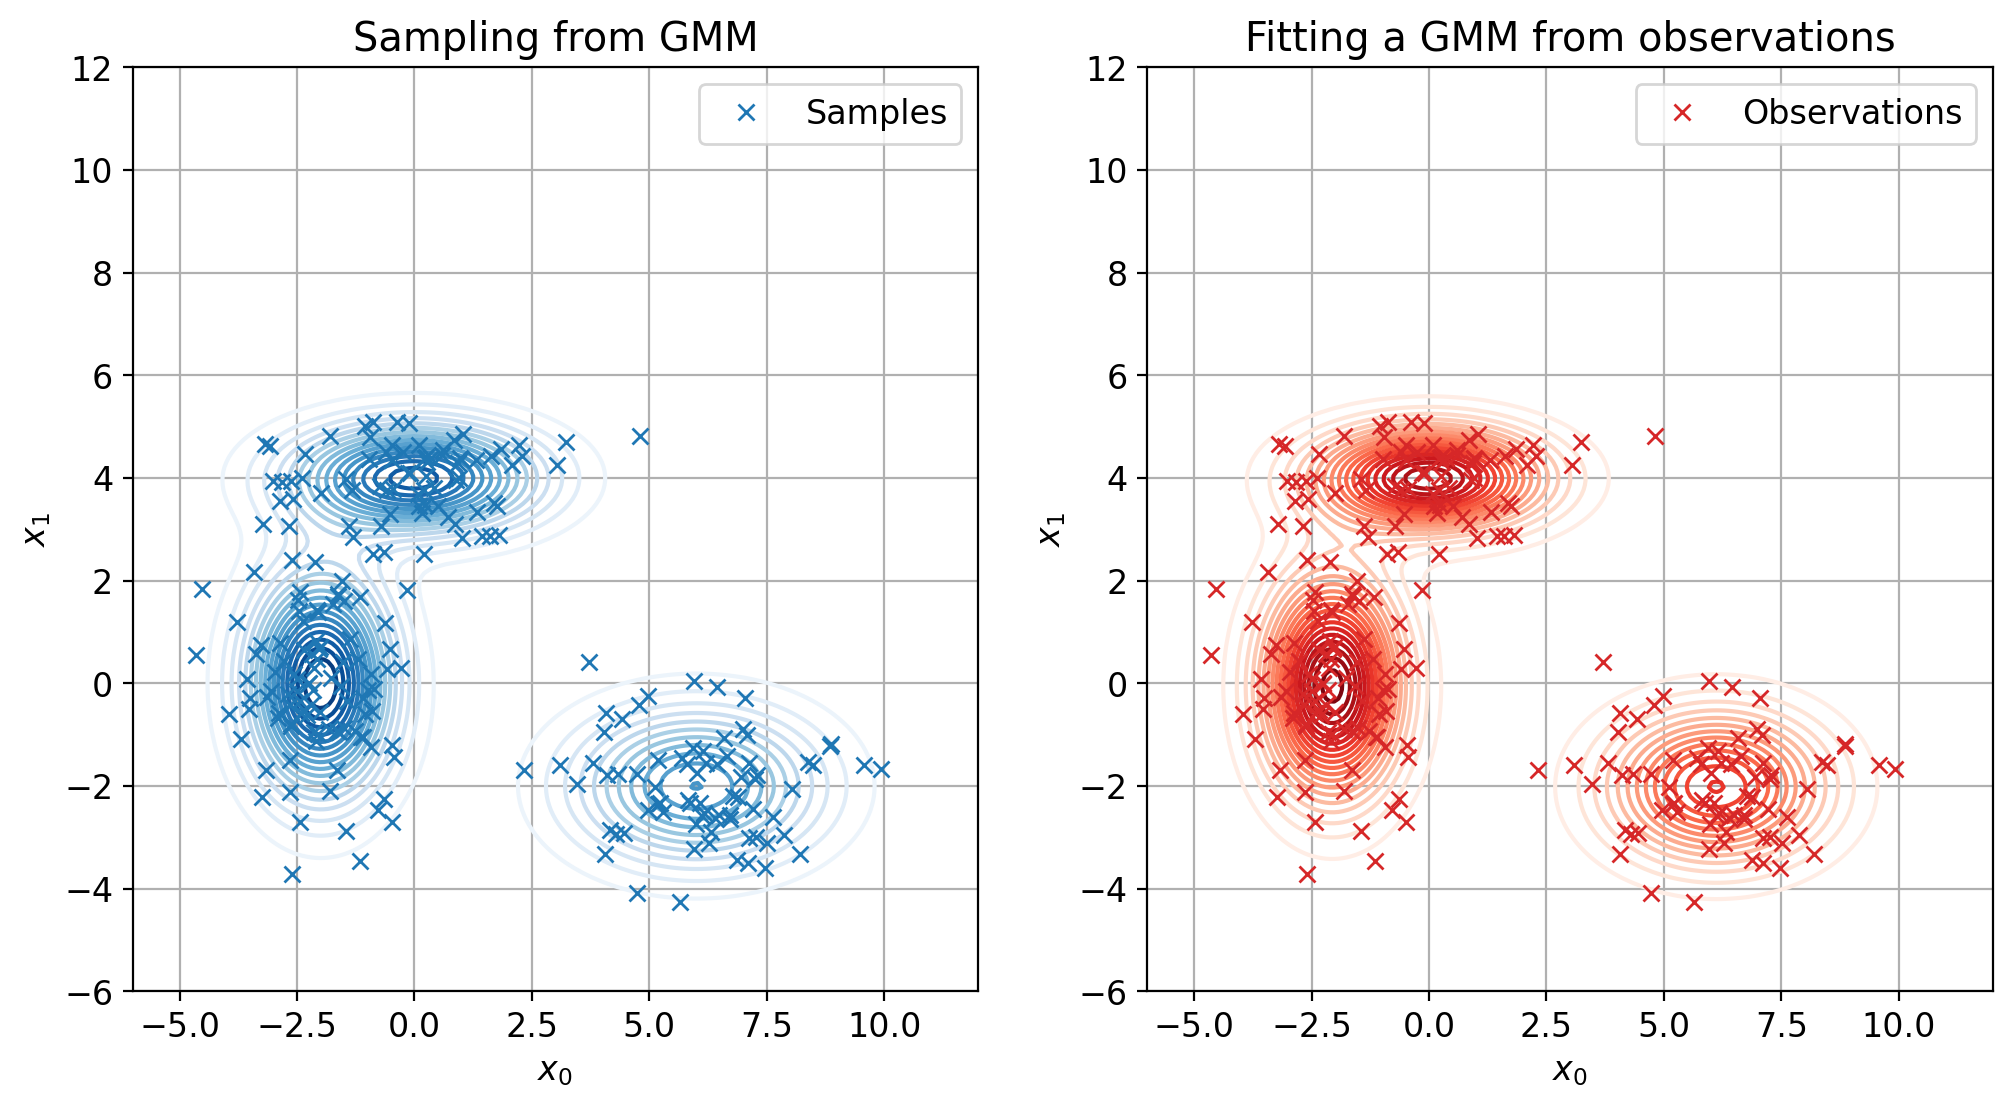

In [16]:
from sklearn.mixture import GaussianMixture as GMM


# Example of a GMM with K=3 and D=2
# Create a dataset of samples from a GMM with parameters:
mus = np.array([[0,4], [-2,0], [6,-2]])
sigmas = np.array([   [[3, 0], [0, 0.5]], [[1,0],[0,2]], [[3,0],[0,1]] ]) # Diagonal Sigma
pis = np.array([0.3, 0.4, 0.3])

# Sample data from this model (pi*N is the proportion of samples for each component)
N = 250
X_samples= np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*N))
                    for pi, mu, sigma in zip(pis, mus, sigmas)])

# Plot the original distribution
f, ax= plt.subplots(1,2, figsize=(12, 6))
intervals = 200
x0 = np.linspace(-6, 12, intervals)
x1 = np.linspace(-6, 12, intervals)
X0,X1 = np.meshgrid(x0,x1)
xs = np.vstack([X0.ravel(), X1.ravel()]).T
Y = np.zeros(len(xs))
for pi, mu, sigma in zip(pis, mus, sigmas):
    Y += pi*mvn(mu, sigma).pdf(xs)
Y = Y.reshape([intervals,intervals])
ax[0].contour(X0, X1, Y, 20, cmap='Blues')
ax[0].plot(X_samples[:, 0], X_samples[:, 1], 'x', color='tab:blue', label='Samples')
ax[0].grid()
ax[0].set_xlabel(r'$x_0$')
ax[0].set_ylabel(r'$x_1$')
ax[0].set_title('Sampling from GMM')
ax[0].legend(loc='best')

# Fit a new GMM observing the samples
# verbose=2 for learning purposes, if you prefer set verbose=0
gmm = GMM(n_components=3, covariance_type='diag', verbose=2, verbose_interval=1)
gmm.fit(X_samples)
pred_pis = gmm.weights_
pred_mus = gmm.means_
pred_sigmas = gmm.covariances_

# Plot the fitted GMM
Y = np.zeros(len(xs))
for pi, mu, sigma in zip(pred_pis, pred_mus, pred_sigmas):
    Y += pi*mvn(mu, sigma).pdf(xs)
Y = Y.reshape([intervals,intervals])
ax[1].contour(X0, X1, Y, 20, cmap='Reds')
ax[1].plot(X_samples[:, 0], X_samples[:, 1], 'x', color='tab:red', label='Observations')
ax[1].grid()
ax[1].set_xlabel(r'$x_0$')
ax[1].set_ylabel(r'$x_1$')
ax[1].set_title('Fitting a GMM from observations')
ax[1].legend(loc='best')

print('Original means: ')
print(mus)

print('Fitted means after ' + str(gmm.n_iter_) + ' EM iterations: ')
print(pred_mus)

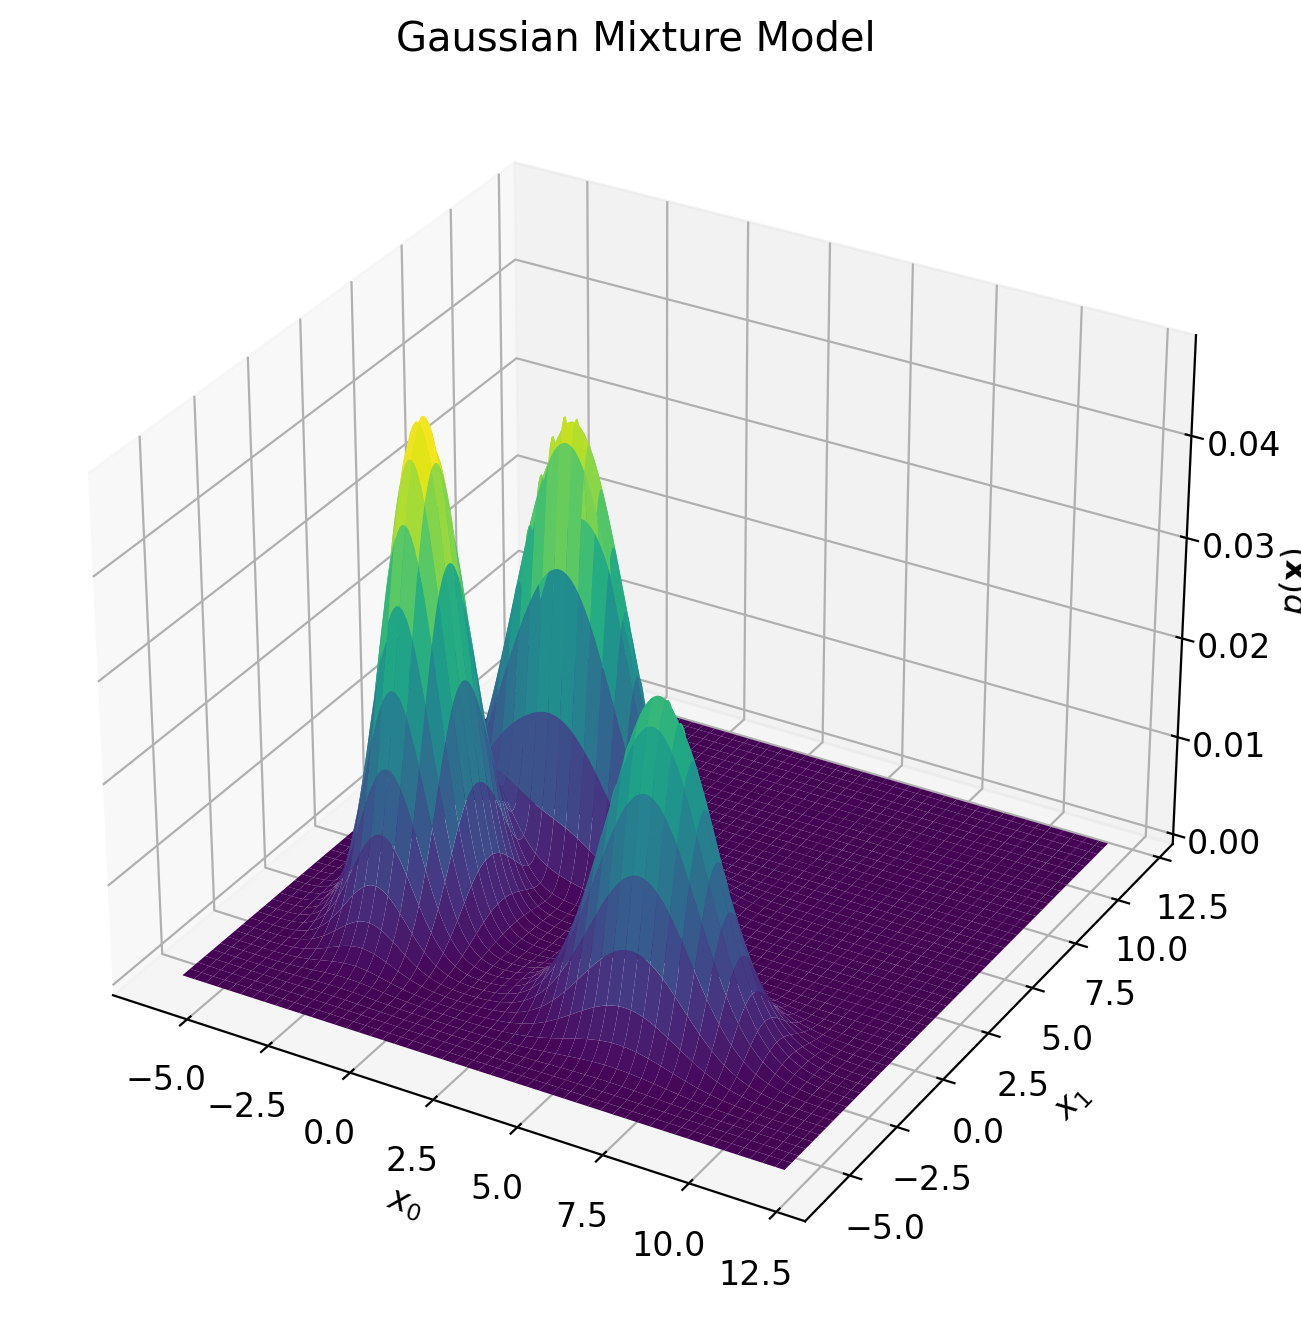

In [17]:
# PDF surfplace plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X0, X1, Y, cmap='viridis')
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel(r'$p(\mathbf{x})$')
plt.title('Gaussian Mixture Model');


## 1.2. Choosing the number of components

An important question that typically arises when fitting a generative probabilistic model is how to select the right number of components. This problem is known as **model selection**.

A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, **using cross-validation to avoid over-fitting.** Namely, we evaluate the model log-likelihood for a validation set not used for training. 

Alternatively, the optimal Bayesian approach is to pick the model with the largest **marginal likelihood**:

\begin{align}
K^* = \arg\max_{K} p(\mathbf{X}|K) = \arg\max_{K} \int_{\mathbf{\theta}} p(\mathbf{X}|\mathbf{\theta},K) p(\mathbf{\theta}|K) d\mathbf{\theta}
\end{align}

In general, computing the marginal likelihood is quite difficult. Assuming a that prior distribution $p(\mathbf{\theta}|K)$ is Gaussian and very broad, we can approximate this term by the so-called **Bayessian Information Criterion** (BIC)
\begin{align}
-\log p(\mathbf{X}|K) \approx \frac{K\log N}{2}-\log p(\mathbf{X}|\mathbf{\theta}_{MAP},K)
\end{align}

where $\mathbf{\theta}_{MAP}$ is the mode of $p(\mathbf{\theta}|\mathbf{X},K)$, which is what we approximate with the EM (assuming again a very broad prior that does not weight much if the number of data points is large enough). **See Section 4.4.1. of Bishop's book for more details**. BIC is also very nicely derived in this [link](http://www.cs.toronto.edu/~mbrubake/teaching/C11/Handouts/BIC.pdf).

In summary:

- BIC gives us a way to choose between two different models with different numbers of parameters by selecting the one whichgives us the **lowest BIC score**.

- More complex models are almost always likely to fit the data better (andtherefore have a lower value of $- \log p(\mathbf{X}|\mathbf{\theta}_{MAP},K)$).

- BIC gives us a relatively principled way to penalize these extra parameters in the form of the term $\frac{K\log N}{2}$. Note that this term doesn’t just penalize more parameters, italso says that if you have more data, you expect those extra parametersto help you that much more.

**Note: The BIC approximation is implemented in the GaussianMixture object of sklearn. Just call <code>model.bic(X)</code>.* 

## 1.3. Experiment: Clustering a Wine dataset

In this experiment, we're going to fit a GMM to the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


In [18]:
wines = pd.read_csv('wines.csv')
N=len(wines)
print('N='+str(N))
wines_data = wines.values
wines.head()

N=6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
# Normalize the data
def normalize(data):
    mean = np.mean(data)
    var = np.var(data)
    data -= mean
    data /= var
    
    return data

wines_data = normalize(wines_data)


**TASK: Make a validation using the BIC criterion to choose the number of components that best explains the dataset. Use $K=[1, 2, .., 10]$. Plot the BIC curve.**

**Which is the optimal number of cluster to explain the wines dataset?**.
- Your answer


Best number of components (K) according to BIC: 9


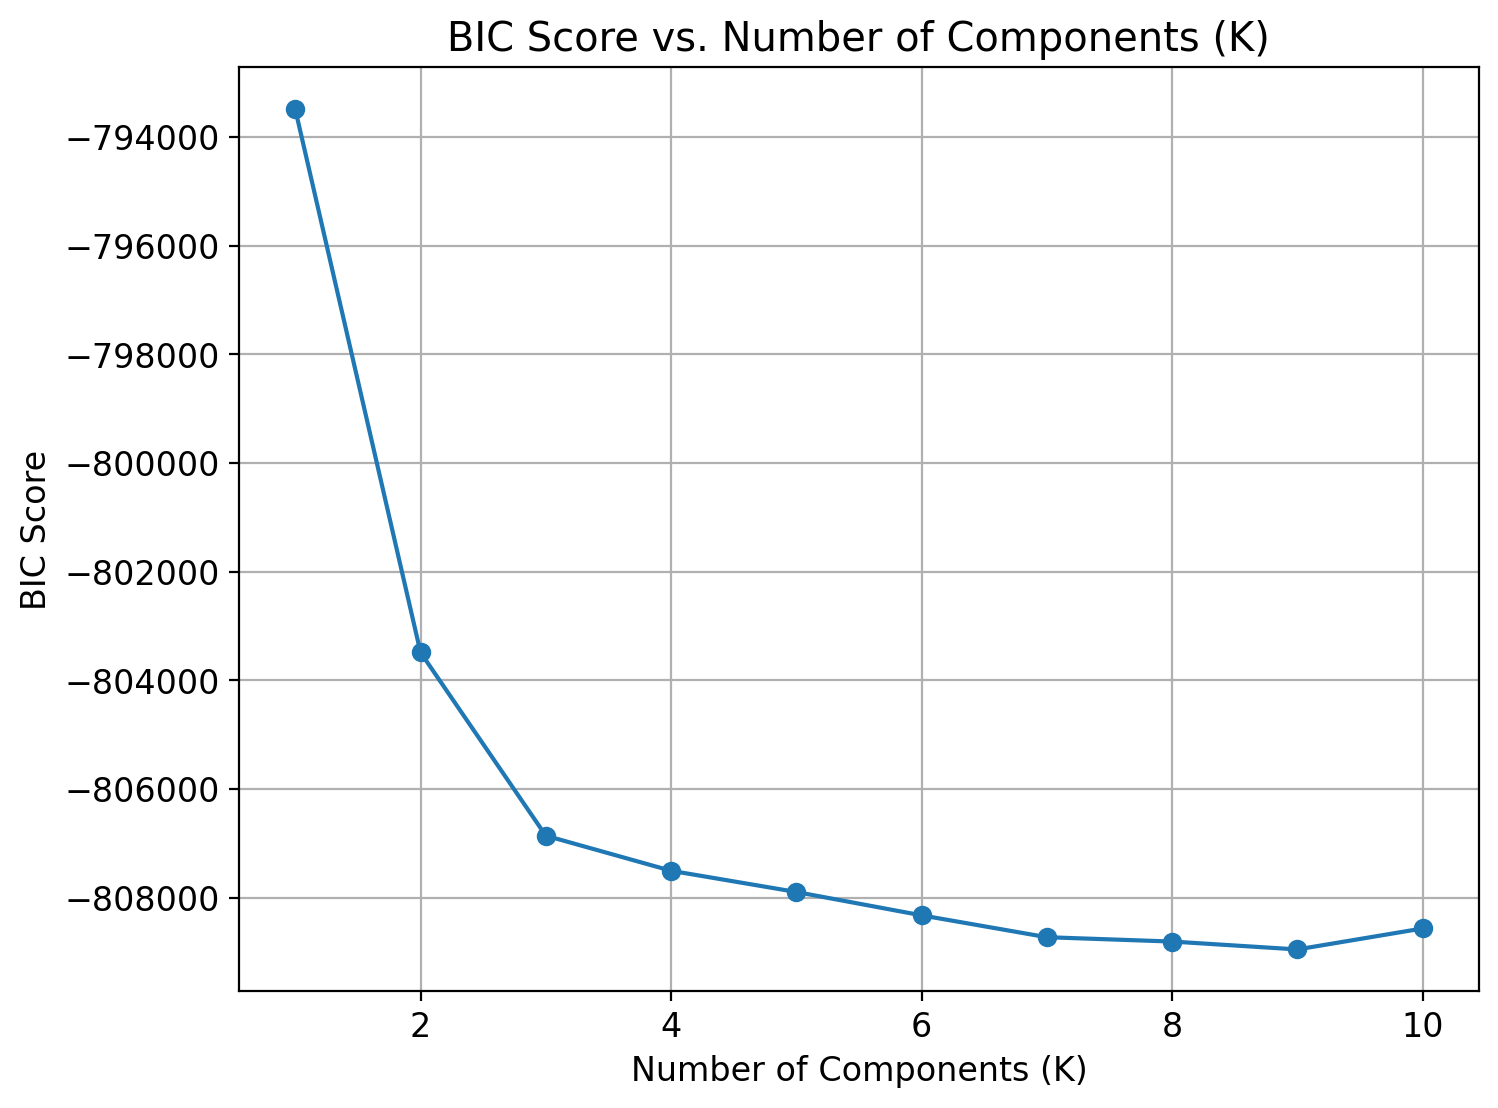

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

data = wines_data

def bic_val(data, K_list):
    bic_scores = []  # To store BIC scores for different values of K

    for K in K_list:
        # Create a Gaussian Mixture model with K components
        gmm = GaussianMixture(n_components=K, random_state=42, covariance_type='diag')

        # Fit the model to the data
        gmm.fit(data)

        # Calculate the BIC score for the model
        bic = gmm.bic(data)

        # Append the BIC score to the list
        bic_scores.append(bic)

    # Find the value of K with the lowest BIC score
    best_K = K_list[np.argmin(bic_scores)]

    return [best_K, bic_scores]

K_list = np.linspace(1, 10, 10).astype(int)  # List of candidate values for K
best_K = bic_val(data, K_list)
print("Best number of components (K) according to BIC:", best_K[0])

plt.figure(figsize=(8, 6))
plt.plot(K_list, best_K[1], marker='o', linestyle='-')
plt.title('BIC Score vs. Number of Components (K)')
plt.xlabel('Number of Components (K)')
plt.ylabel('BIC Score')
plt.grid(True)
plt.show()


We know that the best BIC is the one with highest or more negative in this case, BIC value. Seeing the plot, we can see that best way to classify the wines is by clustering in 9 different groups, so that there are 9 types of wine. 

**For the selected $K$, compute the number of wines associated to each cluster.**


In [21]:
selected_K = best_K[0]

# Create and fit the GMM model with the selected K
gmm = GaussianMixture(n_components=selected_K, random_state=42 , covariance_type='diag')
gmm.fit(data)

# Assign each wine to a cluster
cluster_assignments = gmm.predict(data)

# Count the number of wines in each cluster
cluster_counts = {}
for cluster in range(selected_K):
    cluster_counts[cluster] = len(cluster_assignments[cluster_assignments == cluster])
# Print the number of wines in each cluster
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster+1}: {count} wines")


Cluster 1: 642 wines
Cluster 2: 855 wines
Cluster 3: 537 wines
Cluster 4: 738 wines
Cluster 5: 1477 wines
Cluster 6: 183 wines
Cluster 7: 355 wines
Cluster 8: 1679 wines
Cluster 9: 31 wines


## 1.3.2 Experiment: MRI Image segmentation

In GMMs, we can obtain the posterior probability to belong to each cluster for each observation, which may have some interpretability. One application of clustering algorithms is image segmentation, which consists on separating meaningful parts of an image. Each pixel in the image is substituted by the mean of the associated cluster (maximizing wrt $k$ the responsibilities $r_{ik}$).

For example, in MRI brain images, we can perform segmentation with GMMs by assigning the most probable cluster per datapoint, and this will give us an estimation of different parts of the brain (Cerebrospinal Fluid, Grey Matter, White Matter). These parts are usually extracted as a initial stage for other applications, as, for example, Alzheimer detection.

We are going to fit a GMM to a sample image from [IBSR dataset](https://www.nitrc.org/projects/ibsr).


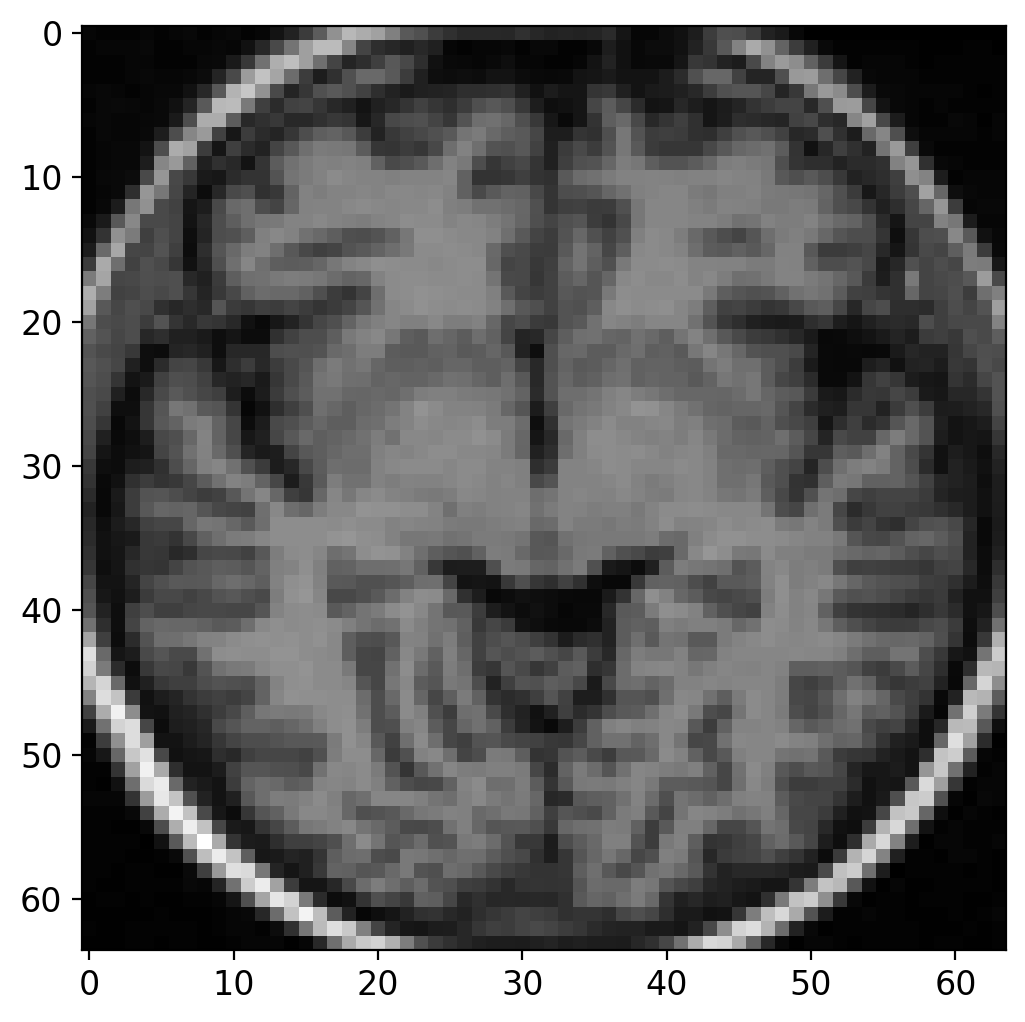

In [22]:
# Read the image
img=mpimg.imread('mri.png')
plt.gray()
plt.imshow(img)

# We want to obtain only the points inside the skull
X_all = np.reshape(img.copy(), [-1, 1])

# Set the background to black
out = X_all<0.035  # threshold to consider black
X_all[out] = 0

# Select pixels inside the skull
mask = X_all!=0 # This will filter black pixels
X = X_all[mask][:, np.newaxis]


**TASK: Validate the number of components $K$ using the BIC criterion, and for the chosen $K$, obtain the segmented representation of the brain image. Plot the original and segmented together to appreciate better the effect of segmentation. The components are supposed to represent, at least: the CSF, WM, GM and cortex tissues.**

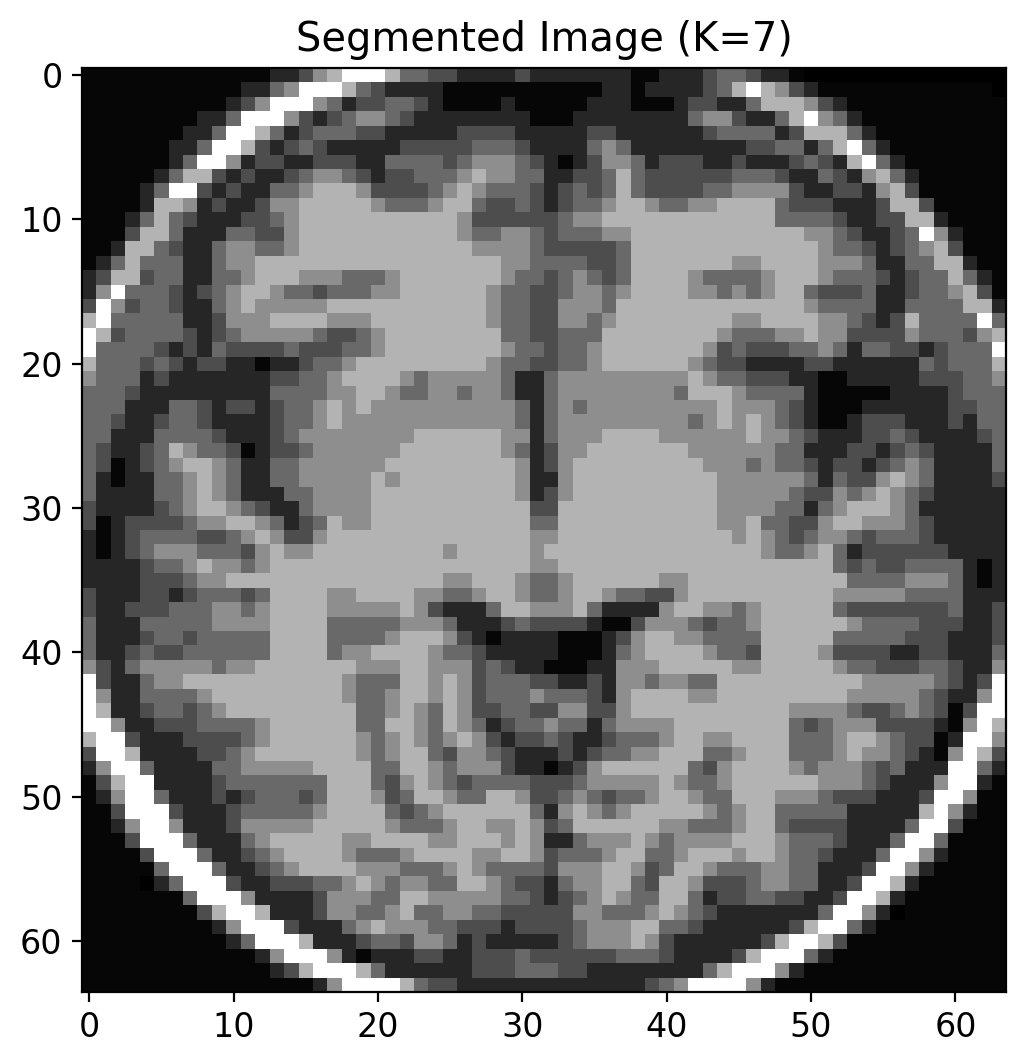

In [23]:
X_all = np.reshape(img.copy(), [-1, 1])

brain_mask = X_all != 0
X = X_all[brain_mask][:, np.newaxis]

K_list = range(1, 11) 
bic_scores = []  
for K in K_list:
    gmm = GaussianMixture(n_components=K, covariance_type='diag', random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

optimal_K = K_list[np.argmin(bic_scores)]

gmm = GaussianMixture(n_components=optimal_K, covariance_type='diag', random_state=42)
gmm.fit(X)
segmentation = gmm.predict(X)

cluster_means = gmm.means_
segm = cluster_means[segmentation]

segm_all = np.zeros_like(X_all)
segm_all[brain_mask] = np.squeeze(segm)


segm_all = np.reshape(segm_all, img.shape)
plt.imshow(segm_all, cmap='gray')
plt.title(f'Segmented Image (K={optimal_K})')


plt.show()

## 1.4. K-Means

There is a popular variant of the EM algorithm for GMMs known as the K-means algorithm. Consider a GMM in which we make the following assumptions: $\Sigma_k=\sigma^2\textbf{I}$ (isotropic Gaussian) is *fixed*, and $\pi_k=1/K$ (uniform categorical) is *fixed*. Then, only the cluster centers, $\boldsymbol{\mu}_k \in \mathbb{R}^D$, have to be estimated. If we consider the following delta function approximation to the posterior computed during the E step:
\begin{equation}
p(zi=k | \mathbf{x}_i, \theta) \approx \mathbb{I}(k=z_i^*)
\end{equation}
where $z_i^* = \text{argmax}_k p(zi=k | \mathbf{x}_i, \theta)$. This is sometimes called **hard EM**, since we are making a hard assignment of points to clusters. Since we assumed an wqual spherical covariance matrix for each cluster, the most probable cluster for $\mathbf{x}_i$ can be computed by finding th nearest prototype:
\begin{equation}
z_i^* = \text{argmin}_k ||\textbf{x}_i - \mu_k||_2^2
\end{equation}
Hence, in each E step, we must find the Euclidean distance between N data points and $K$ cluster centers. Given the hard cluster assignments, the M step updates each cluster center by computing the mean of all points assigned to it:
\begin{equation}
\mu_k = \frac{1}{N_k}\sum_{i:z_i=k} \mathbf{x_i}
\end{equation}

There exists an class that implements [K-Means in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).


## 1.5. Experiment: K-Means for image compression

In the next experiment you are going to compress an image using K-Means (a simpler version of a GMM, i.e. with fixed covariances and mixing weights). K-means assumes that every cluster (centroid) is equiprobable. We can use the number of centroids $K$ to represent a palette of colors, and represent the color for each pixel with the index of the nearest centroid $k$.

**TASK: Use the Lena sample image to obtain a compressed version with K=[64, 32, 16, 8, 4, 2] components, and plot each result.**

/nix/store/1q4r4ay61ka4djnf5li78zw52lxnl6x3-python3-3.10.12-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/nix/store/1q4r4ay61ka4djnf5li78zw52lxnl6x3-python3-3.10.12-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/nix/store/1q4r4ay61ka4djnf5li78zw52lxnl6x3-python3-3.10.12-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/nix/store/1q4r4ay61ka4djnf5li78zw52lxnl6x3-python3-3.10.12-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/nix/store/1q4r4ay61ka4dj

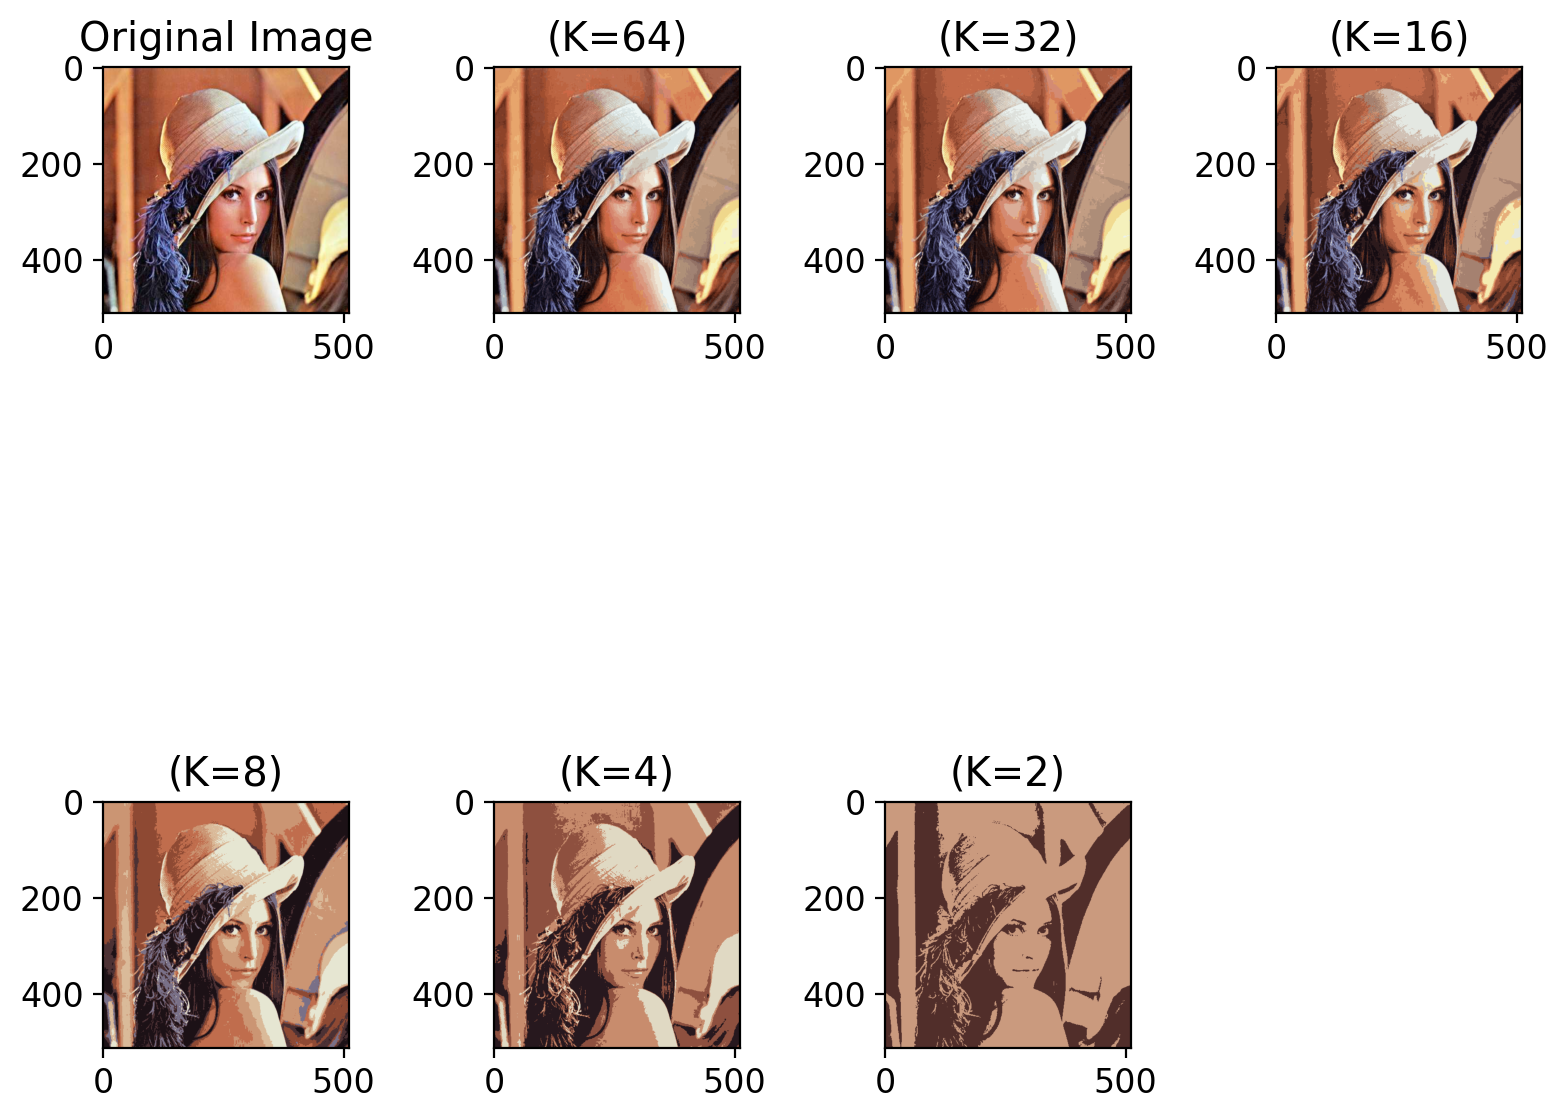

In [24]:
from sklearn.cluster import KMeans
import scipy.misc

lena = mpimg.imread('lena.jpg')
plt.figure(figsize=(8, 8))

plt.subplot(2, 4, 1)
plt.imshow(lena)
plt.title('Original Image')

X = lena.reshape([-1, 3])
K = [64,32,16,8,4,2]

for i, k in enumerate(K):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    X_compressed = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = X_compressed.reshape(lena.shape)/255.0
    
    plt.subplot(2, 4, i + 2)
    plt.imshow(compressed_image)
    plt.title(f'(K={k})')

plt.tight_layout() 
plt.show()

# 2. Mixtures of Bernoulli distributions

In this par of the notebook notebook you will implement the EM algorithm for mixtures of Bernoulli distributions. This model is also known as [*latent class analysis*](https://en.wikipedia.org/wiki/Latent_class_model). As well as being of practical importance on its own right, understading this model and its learning also lay the fundation for **hidden Markov models (HMMs)** over discrete variables. HMMs will be dicussed in future course sessions.

Consider a set of i.i.d. $D$-dimensional binary (0-1) vectors. Examples of this kind of data are binary images, binary detection results, or genetic markers. Consider also a mixture of multinomials (or multivariate Bernoullis) model for each of the vectors, $\mathbf{x}$,

$$\displaystyle p(\mathbf{x} | \boldsymbol{\Theta},\mathbf{\pi} ) = \sum_{k=1}^K \pi_k p_k(\mathbf{x}^{(i)}|\boldsymbol{\theta}_k) = \sum_{k=1}^K \pi_k \prod_{j=1}^D \theta_{jk}^{x_{j}} (1-\theta_{jk})^{1-x_{j}},$$
where $\boldsymbol{\Theta}=[\boldsymbol{\theta}_1,\ldots,\boldsymbol{\theta}_K]$. If we are given a data set $\mathbf{X}=\{\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(N)}\}$ then the log likelihood function for this model is given by

\begin{align}
\log p(\mathbf{X}|\boldsymbol{\Theta},\mathbf{\pi}) = \sum_{i=1}^N \log\left(\sum_{k=1}^D \pi_k p(\mathbf{x}^{(i)}|\boldsymbol{\theta}_k)\right)
\end{align}

Again, we have te $\log$ of a sum, which remains non-convex and is hard to optimaze.

In contrast with to the GMM, in this model, we add an extra to prevent overfitting, we will also use a **prior distribution** for the model parameters. For $\boldsymbol{\Theta}$ we have

\begin{align}
\theta_{jk}&\sim\text{Beta}(\alpha,\beta)\\
p(\boldsymbol{\Theta}) &= \prod_{k=1}^{K} \prod_{j=1}^D p(\theta_{jk})\\
p(\theta_{jk}) &= \frac{\theta_{jk}^{\alpha-1}(1-\theta_{jk})^{\beta-1}}{\text{B}(\alpha,\beta)},
\end{align}
where $\text{B}(\alpha,\beta)$ is the [Beta function](https://en.wikipedia.org/wiki/Beta_function), that we have studied in previous sessions.

For $\mathbf{\pi}$ we use a uniform [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) (that we have also studied):
\begin{align} 
\mathbf{\pi}&\sim \text{Dir}(\frac{1}{K}, \ldots, \frac{1}{K}) \Rightarrow p(\mathbf{\pi}) =\frac{1}{\text{B}(\frac{1}{K}, \ldots, \frac{1}{K})}\prod_{k=1}^{K}\pi_k^{\frac{1}{K}-1},
\end{align}
where $\text{B}(\frac{1}{K}, \ldots, \frac{1}{K})$ is the multivariate Beta function.


We now derive the EM algorithm for maximizing the **posterior** distribution $p(\mathbf{\Theta},\mathbf{\pi}|\mathbf{X})$. To do this, we introduce an explict discrete latent variable $z\in\{1,\ldots,K\}$ associated to each data point $\mathbf{x}$:
\begin{align}
p(\mathbf{x},z) = \prod_{k=1}^{K} \left(\pi_k ~p_{k}(\mathbf{x})\right)^{\mathbb{1} [z==k]}, ~~ p(z)=\prod_{k=1}^K \pi_k^{\mathbb{1} [z==k]}
\end{align}

#### Complete log-likelihood

We write the complete data log-likelihood as follows:
\begin{align}
\log p(\mathbf{X},\mathbf{z}|\boldsymbol{\Theta},\mathbf{\pi})=\sum_{i=1}^{N}\sum_{k=1}^{K}\mathbb{1} [z^{(i)}==k]\left(\log \pi_k + \sum_{j=1}^D \left[x_{j}^{(i)}\log\theta_k+(1-x_{j}^{(i)})\log(1-\theta_k)\right]\right)
\end{align}

#### Posterior distribution of $\mathbf{z}$ given $\boldsymbol{\Theta},\mathbf{\pi}$

In the $E$-step, we have to compute the expected complete data log-likelihood w.r.t. posterior distribution of $\mathbf{z}$ given the current values of $\boldsymbol{\Theta},\mathbf{\pi}$:
\begin{align}
p(z^{(i)}=k|\mathbf{x}^{(i)},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)}) \triangleq r_{ik} = \frac{\pi_{(k,t-1)} p_k(\mathbf{x}|\boldsymbol{\theta}_k) }{\sum_{q=1}^K \pi_{(q,t-1)} p_k(\mathbf{x}^{(i)}|\boldsymbol{\theta}_q)}, ~~~ k=1,\ldots, K
\end{align}


## 2.1. The EM algorithm for a mixture of Bernouillis

#### E-step
It is easy to show that
\begin{align}
\mathcal{Q}(\boldsymbol{\Theta},\mathbf{\pi},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)})&=\mathbb{E}_{p(\mathbf{z}|\mathbf{X}^{(i)},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)})}[\log p(\mathbf{X},\mathbf{z}|\boldsymbol{\Theta},\mathbf{\pi})]\\
&=\sum_{i=1}^{N}\sum_{k=1}^K r_{ik} \left(\log \pi_k + \sum_{j=1}^D \left[x_{j}^{(i)}\log\theta_k+(1-x_{j}^{(i)})\log(1-\theta_k)\right]\right)
\end{align}

#### M-step

We have to find
\begin{align}
\boldsymbol{\Theta}_t,\mathbf{\pi}_t = \arg \max_{\boldsymbol{\Theta},\mathbf{\pi}} ~~\mathcal{Q}(\boldsymbol{\Theta},\mathbf{\pi},\boldsymbol{\Theta}_{(t-1)},\mathbf{\pi}_{(t-1)})+ \log p(\boldsymbol{\Theta})+\log p(\mathbf{\pi})
\end{align}

As a result, one can prove that the maximum is attained at

\begin{align}
r_k &\triangleq \sum_{i=1}^N r_{ik} \\\\
\pi^t_k &= \frac{r_k+\frac{1}{K}-1}{N+1-K}\\\\
\boldsymbol{\theta}_k &= \frac{\sum_{i=1}^N r_{ik}\mathbf{x}^{(i)}+\alpha-1}{r_k+\alpha+\beta-2} 
\end{align}

To see details about the derivation of this result, check out chapter 9 of Bishop's book. Also Chapter 11 of Murphy's book.

## 2.2. Experiment: Implementing the EM algorithm for a Mixture of Bernouillis

**TASK: Given the functions with all the steps implemented, build a higher-level function that performs the EM algorithm. The E-Step should compute $r_{ik}$, with $i=1,\ldots,N$, $k=1,\ldots,K$ for each data point. It should take as input the current values of $\boldsymbol{\pi}$, $\boldsymbol{\Theta}$, and the matrix $\mathbf{X}$ of observations. The M-Step should update the values of $\boldsymbol{\pi}$, $\boldsymbol{\Theta}$.**

In [25]:

def bernouilli_pdf(X,Thetak):
    M = np.exp(X*np.log(Thetak+1e-2)+(1-X)*np.log(1-Thetak+1e-2)) 
    P = np.prod(M,1)
    return P

def responsibilities(X,P,Theta,K):
    N,D = X.shape
    R = np.zeros([N,K])
    
    for k in range(K):
        R[:,k] = bernouilli_pdf(X,Theta[k,:])
                
    R *= P.T
    R /= np.sum(R,1).reshape([-1,1])    
    
    return R


In [26]:

def points_cluster(R):
    return np.sum(R,0)

def new_Pi(R,N):
    Rk = points_cluster(R)
    return Rk/N

def new_Theta(R,X,K,alpha,beta):
    
    Theta = np.zeros([K,D])
    Rk = points_cluster(R)

    for k in range(K):
        Theta[k,:] = (np.sum(X*R[:,k].reshape([-1,1]),0)+alpha-1) / (Rk[k]+alpha+beta-2)
    return Theta

def log_lik(X,P,Theta,K):
    LL = 0.
    for k in range(K):
        LL += bernouilli_pdf(X,Theta[k,:])*P[k]
    return np.sum(np.log(LL)) #Your code here


In [36]:
def EM_bernouilli(X, K, Niter):
    # Define the prior of Theta with alpha and beta
    alpha = 2.0
    beta = 2.0
    
    #############
    #           #
    # YOUR CODE #
    #           #
    #############
    np.random.seed(42)
    Theta =np.random.beta(alpha, beta, size=(K, X.shape[1]))
    Pi = np.random.dirichlet([1/K]*K)
    LL = np.empty(Niter)

    #now iterate in Niter
    for i in range(Niter):
      LL[i]=log_lik(X, Pi, Theta, K)
      R  = responsibilities(X, Pi, Theta, K)
      Pi = new_Pi(R, N)
      Theta = new_Theta(R, X, K, alpha, beta)
        
    return Pi, Theta, R, LL

## 2.3. EM for a Digits Dataset

In this section you will train a Mixture of Bernouillis to a binarized version of [digits dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html). 

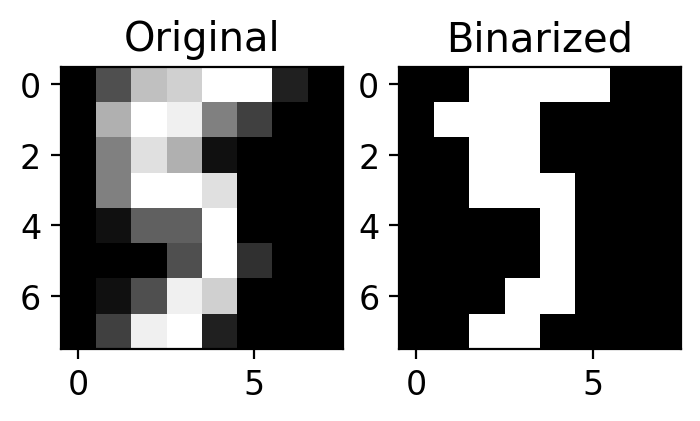

In [37]:
from sklearn.datasets import load_digits

# Load digits dataset
digits = load_digits()    #Gray scale, we have to binarize

D = digits.data.shape[-1]
N = digits.data.shape[0]

f, ax = plt.subplots(1, 2, figsize=(4, 2))
plt.gray() 
ax[0].imshow(digits.images[15])
ax[0].set_title('Original')

#Binarization
Bin_Images = np.copy(digits.images)
val_min=np.min(Bin_Images)
val_max=np.max(Bin_Images)
Bin_Images = (Bin_Images - val_min) / (val_max - val_min)
Bin_Images = np.round(Bin_Images)

ax[1].imshow(Bin_Images[15])
ax[1].set_title('Binarized')

# Reshape to obtain vector observations
X = Bin_Images.reshape([-1,D])


**TASK: Train a Mixture of Bernouillis for the digits dataset. Choose the number of clusters $K$ by common sense, without necessarily validating.**

In [38]:
K=10   #Because it is the number of digits we are trying to recognize
Niter = 20
Pi, Theta, R, LL = EM_bernouilli(X,K,Niter)

**TASK: Plot the negative log-likelihood obtained at each iteration using logarithmic y-axis (it should decrease). *Note: Compute it before E-Step.***

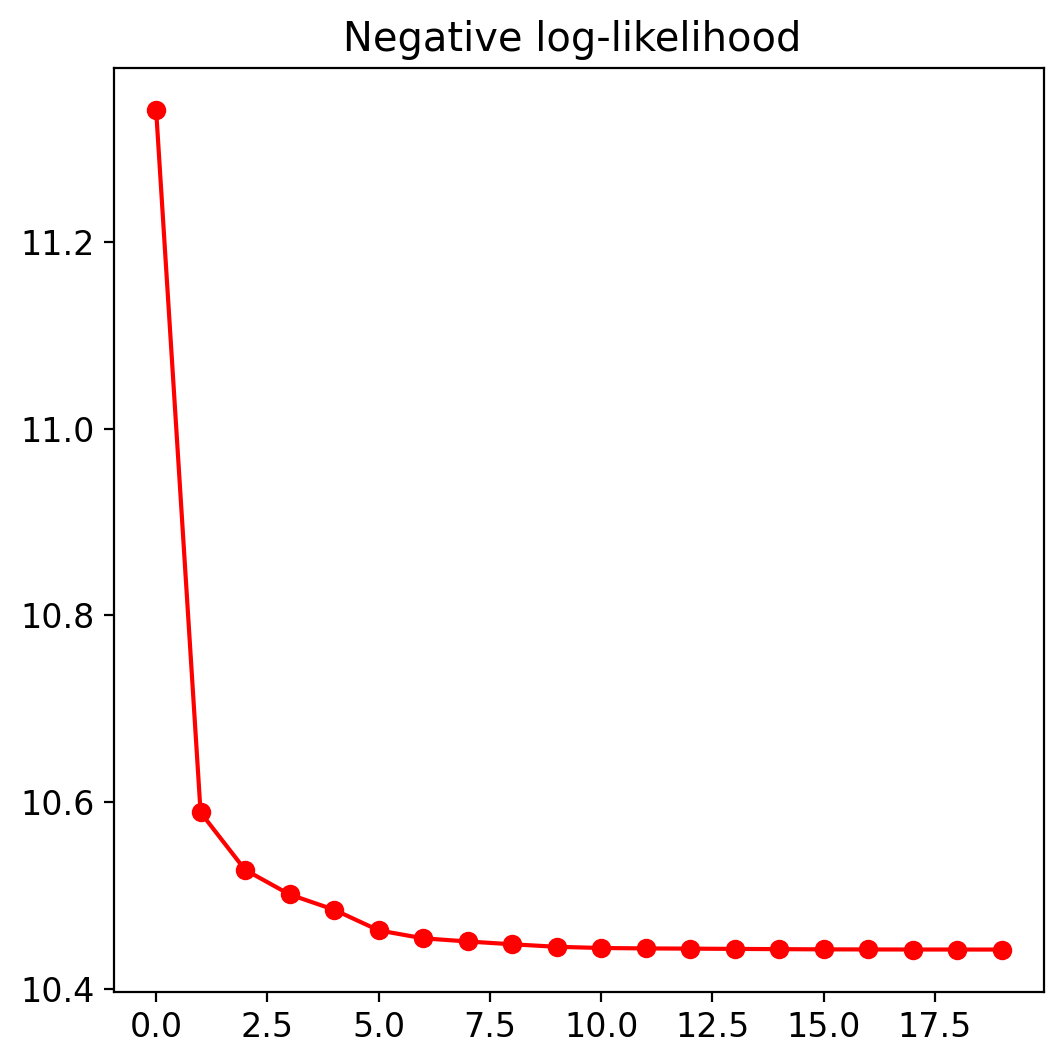

In [39]:
plt.plot(range(Niter),np.log(-LL),"-ro")
plt.title('Negative log-likelihood ')
plt.show()

**TASK: Plot as a 8x8 gray-scale image each $\theta_k$ vector (reshaping from 64 to (8, 8)). It represents the probability for each pixel to be 1, for each cluster $k$.**

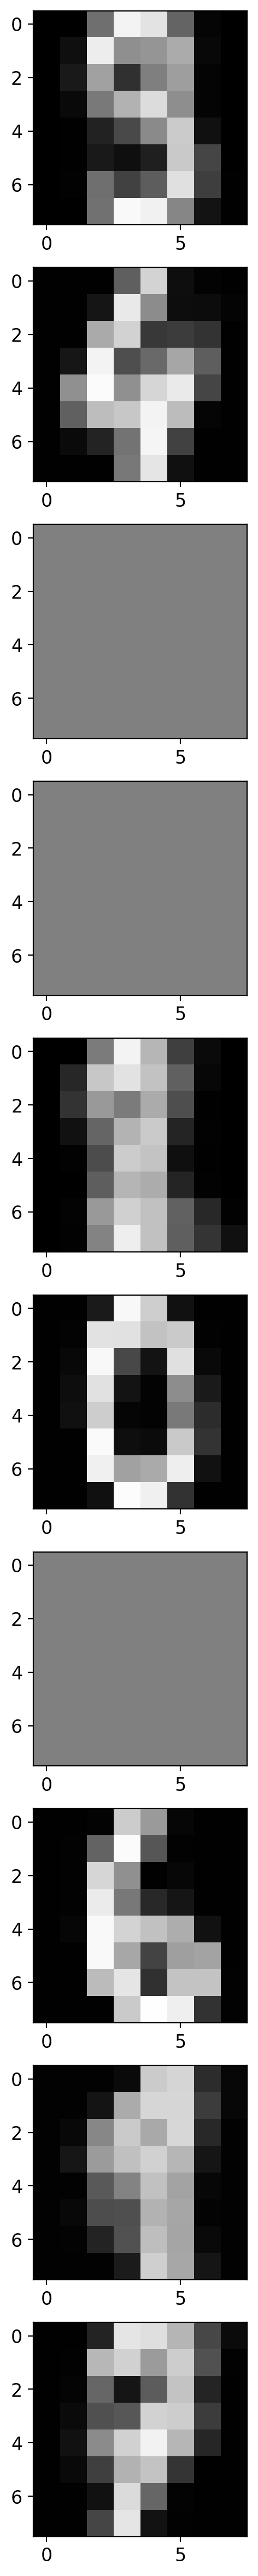

In [40]:
fg, ax = plt.subplots(10, 1, figsize=(30, 30))
for i in range(10):
    prob = Theta[i, :].reshape((8,8)) #reshaping from 64 to (8,8)
    ax[i].imshow(prob, vmin=0.0, vmax=1.0)

## References

[1]. Murphy, K. P. (2012). Machine learning: a probabilistic perspective. MIT press.

[2]. Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

